# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

## **Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
!pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## **Looking at DF**

In [0]:
# Looking at my df
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)

In [4]:
df.shape

(1460, 81)

In [0]:
# Converting a numbers and placing nans in their own spot
def describe(df):
    df = pd.concat([df.describe(include='all').T, 
                    pd.Series(df.dtypes, name='dtype'),
                    pd.Series(df.isna().sum() / len(df) * 100, name='nan%')], 
                   axis=1)
    return df

In [0]:
desc_numbers = describe(df.select_dtypes('number'))
desc_numbers.sort_values('nan%', ascending=False)

## **Cleaning Nulls **

In [7]:
# How many nulls do I have?
df.isnull().sum().sum()

6965

In [8]:
# Dropping the columns I do not need
data = df.drop(columns = ['LotFrontage', 'Alley', 
                          'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                          'BsmtFinType2', 'FireplaceQu', 'GarageType',
                          'GarageFinish', 'GarageYrBlt','GarageQual','GarageCond', 'PoolQC',
                          'Fence','MiscFeature'])
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# How many NaN's
data.isna().sum().sum()

17

In [0]:
data.fillna(method='ffill')

In [0]:
numbers_only = data.select_dtypes(include=['float','int']).dropna(axis=1)

In [13]:
numbers_only.isna().sum().sum()

0

## **Polynominal**

In [0]:
numbers_only.dtypes

**Looking at Year Sold and Month Sold**

In [20]:
# Polynominal Feature #1
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [21]:
df['Yr_Squared']= df['YrSold']**2
df['Yr_Squared'].head()

0    4032064
1    4028049
2    4032064
3    4024036
4    4032064
Name: Yr_Squared, dtype: int64

In [0]:
df['Yr_Squared'].plot.hist(figsize=(10,8));

In [23]:
# Polynominal Feature #2
df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [24]:
df['Mo_Squared']= df['MoSold']**2
df['Mo_Squared'].head()

0      4
1     25
2     81
3      4
4    144
Name: Mo_Squared, dtype: int64

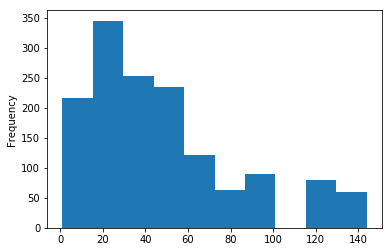

In [25]:
df['Mo_Squared'].plot.hist();

## **Interaction Feature**

In [26]:
# Interaction feature 
df['Time_sold']= df['YrSold'] * df['MoSold']
df['Time_sold'].head()

0     4016
1    10035
2    18072
3     4012
4    24096
Name: Time_sold, dtype: int64

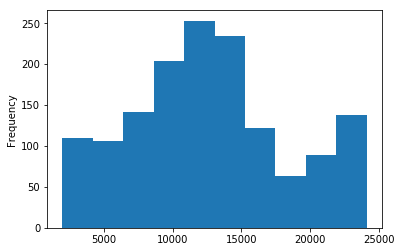

In [27]:
df['Time_sold'].plot.hist();

## **Log Transformed Y**

In [0]:
df['ln_price'] = np.log(df['SalePrice'])

In [29]:
df['ln_price'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: ln_price, dtype: float64

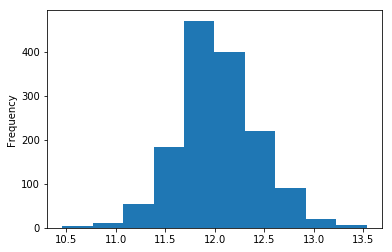

In [30]:
df['ln_price'].plot.hist();

## **10 Other Engineered Features**

In [0]:
df.dtypes

In [0]:
# Engineering Age of Property
df['Age'] = 2019 - df['YearBuilt']
df['Age_squared'] = df['Age']**2

In [0]:
# Engineering Qverall Quality and Overall Condition
df['Quality_Squared']= df['OverallQual']**2
df['Condition_Squared']= df['OverallCond']**2

In [0]:
# Engineering Total Sqft
df['Total_SF'] = df['GrLivArea'] + df['TotalBsmtSF']

In [0]:
# Sqft breakdown
df['Lot_size_squared'] = df['LotArea']**2
df['Living_squared'] = df['Total_SF']**2

In [0]:
# Bedroom Breakdown
df['Total_no_bed&bath'] = df['BedroomAbvGr'] + df['FullBath'] + (0.5* df['HalfBath'])
df['Price_per_sqft_bed&bath'] = df['total_SF']/df['Total_no_bed&bath']

In [0]:
# Yard Size
df['Yard_Size'] = df['LotArea'] - df['Total_SF']

## **Training and Testing**

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data